# 5-1 数据管道Dataset

如果需要训练的数据大小不大，例如不到1G，那么可以直接全部读入内存中进行训练，这样一般效率最高。

但如果需要训练的数据很大，例如超过10G，无法一次载入内存，那么通常需要在训练的过程中分批逐渐读入。

使用 tf.data API 可以构建数据输入管道，轻松处理大量的数据，不同的数据格式，以及不同的数据转换。


## 一 构建数据管道
可以从Numpy, Pandas, generator,csv等文件中构建数据管道

### 1 从Numpy构建数据管道

In [2]:
import tensorflow as tf
import numpy as np
from sklearn import datasets

In [9]:
iris = datasets.load_iris()
for key in iris:
    print(key)
print("data shape:", iris["data"].shape)
print("data label:", iris["target"].shape)

data
target
frame
target_names
DESCR
feature_names
filename
data shape: (150, 4)
data label: (150,)


In [10]:
ds1 = tf.data.Dataset.from_tensor_slices((iris["data"], iris["target"])).prefetch
for features, label in ds1.take(5):
    print(features, label)

tf.Tensor([5.1 3.5 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.9 3.  1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.7 3.2 1.3 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.6 3.1 1.5 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([5.  3.6 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)


### 2 从Pandas中构建数据管道

In [13]:
import pandas as pd
dfiris = pd.DataFrame(iris["data"], columns = iris["feature_names"])
dfiris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
# 把pandas的dataframe转为numpy
ds2 = tf.data.Dataset.from_tensor_slices((dfiris.values, iris["target"]))

for features, label in ds2.take(5):
    print(features, label)

tf.Tensor([5.1 3.5 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.9 3.  1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.7 3.2 1.3 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.6 3.1 1.5 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([5.  3.6 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)


In [27]:
# 使用pandas的to_dict
print((dfiris.to_dict("list")))
ds2 = tf.data.Dataset.from_tensor_slices((dfiris.to_dict("list"), iris["target"]))

{'sepal length (cm)': [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0, 7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], 'sepal width (cm)': [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3.0, 3.4, 3.5, 

In [31]:
for features, label in ds2.take(5):
    print(features, label)
    print("-----------")
    print(type(features), type(label))
    print("=================")

{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=5.1>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.5>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.4>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int64)
-----------
<class 'dict'> <class 'tensorflow.python.framework.ops.EagerTensor'>
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=4.9>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.0>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.4>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int64)
-----------
<class 'dict'> <class 'tensorflow.python.framework.ops.EagerTensor'>
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=4.7>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.2>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.3>

### 3 从Python generator构建数据管道

In [32]:
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
# 定义一个从文件中读取数据的Generator
image_generator = ImageDataGenerator(rescale = 1.0/255).flow_from_directory("../data/cifar2/test",
                                                                            target_size = (32, 32),
                                                                            batch_size = 20, class_mode = "binary")
classdict = image_generator.class_indices
print(classdict)

Found 2000 images belonging to 2 classes.
{'airplane': 0, 'automobile': 1}


In [41]:
for features, label in image_generator:
    print(features.shape)
    break

(20, 32, 32, 3)


In [45]:
def generator():
    for features, label in image_generator:
        yield (features, label)

In [46]:
ds3 = tf.data.Dataset.from_generator(generator, output_types = (tf.float32, tf.int32))

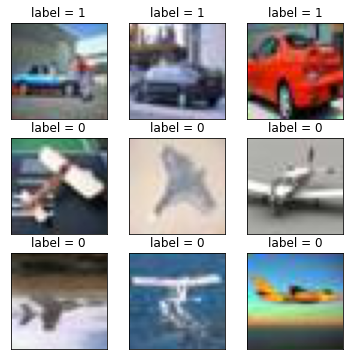

In [51]:
%matplotlib inline
plt.figure(figsize=(6,6))
for i, (img, label) in enumerate(ds3.unbatch().take(9)):
    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(img.numpy())
    ax.set_title("label = %d" % label)
    ax.set_xticks([])
    ax.set_yticks([])

### 4 从csv文件中构建数据管道

In [54]:
ds4 = tf.data.experimental.make_csv_dataset(
        file_pattern = ["../data/titanic/train.csv", "../data/titanic/test.csv"],
        batch_size = 3,
        label_name = "Survived",
        na_value = "",
        num_epochs = 1,
        ignore_errors = True
        )
for data, label in ds4.take(2):
    print(data)
    print('------------')
    print(label)
    print("==============")

OrderedDict([('PassengerId', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 96, 831, 772], dtype=int32)>), ('Pclass', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 3, 3], dtype=int32)>), ('Name', <tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'Shorney, Mr. Charles Joseph',
       b'Yasbeck, Mrs. Antoni (Selini Alexander)',
       b'Jensen, Mr. Niels Peder'], dtype=object)>), ('Sex', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'male', b'female', b'male'], dtype=object)>), ('Age', <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0., 15., 48.], dtype=float32)>), ('SibSp', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 1, 0], dtype=int32)>), ('Parch', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 0, 0], dtype=int32)>), ('Ticket', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'374910', b'2659', b'350047'], dtype=object)>), ('Fare', <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 8.05  , 14.4542,  7.8542], dtype=float32)>), ('Cabin', <tf.T

### 5 从文本文件中构建数据管道

In [55]:
ds5 = tf.data.TextLineDataset(filenames = ['../data/titanic/train.csv', '../data/titanic/test.csv']).skip(1)  # 忽略第一行header

for line in ds5.take(5):
    print(line)

tf.Tensor(b'493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5,C30,S', shape=(), dtype=string)
tf.Tensor(b'53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C', shape=(), dtype=string)
tf.Tensor(b'388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,,S', shape=(), dtype=string)


### 6 从文件路径构建数据管道

In [56]:
ds6 = tf.data.Dataset.list_files('../data/cifar2/train/*/*.jpg')
for file in ds6.take(5):
    print(file)  # 得到的全部是文件路径, 写一个map函数就可以把文件路径转为数字图像

tf.Tensor(b'../data/cifar2/train/automobile/3803.jpg', shape=(), dtype=string)
tf.Tensor(b'../data/cifar2/train/airplane/2988.jpg', shape=(), dtype=string)
tf.Tensor(b'../data/cifar2/train/airplane/4570.jpg', shape=(), dtype=string)
tf.Tensor(b'../data/cifar2/train/airplane/3158.jpg', shape=(), dtype=string)
tf.Tensor(b'../data/cifar2/train/automobile/1123.jpg', shape=(), dtype=string)


### 7 从tfrecords文件构建数据管道

In [58]:
import os

def create_tfrecords(inpath, outpath):
    writer = tf.io.TFRecordWriter(outpath)
    dirs = os.listdir(inpath)
    for index, name in enumerate(dirs):
        class_path = inpath + "/" + name + "/"
        for img_name in os.listdir(class_path):
            img_path = class_path + img_name
            img = tf.io.read_file(img_path)
            example = tf.train.Example(
                features = tf.train.Features(
                    feature = {
                        'label': tf.train.Feature(int64_list = tf.train.Int64List(value = [index])),
                        'img_raw': tf.train.Feature(bytes_list = tf.train.BytesList(value = [img.numpy()]))
                    }
                )
            )
            writer.write(example.SerializePartialToString())
    writer.close()

create_tfrecords('../data/cifar2/test/', './5-1_cifar2_test.tfrecords/')

In [69]:
def parse_example(proto):
    decription = {'img_raw': tf.io.FixedLenFeature([], tf.string), 'label': tf.io.FixedLenFeature([], tf.int64)}
    example = tf.io.parse_single_example(proto, decription)
    tf.print(proto)
    img = tf.image.decode_jpeg(example["img_raw"])
    img = tf.image.resize(img, (32,32))
    label = example["label"]
    return (img, label)

1


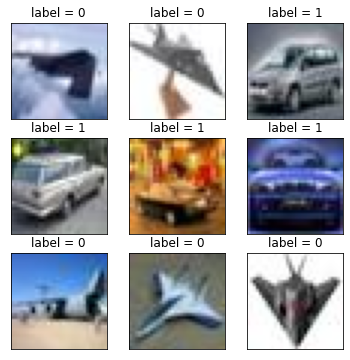

In [70]:
ds7 = tf.data.TFRecordDataset('./5-1_cifar2_test.tfrecords').map(parse_example).shuffle(3000)

plt.figure(figsize=(6,6))
for i, (img, label) in enumerate(ds7.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(img.numpy() / 255.0)
    ax.set_title("label = %d" % label)
    ax.set_xticks([])
    ax.set_yticks([])

In [73]:
for proto in tf.data.TFRecordDataset('./5-1_cifar2_test.tfrecords').take(1):
    print(proto)

tf.Tensor(b'\n\xb0\x06\n\x0e\n\x05label\x12\x05\x1a\x03\n\x01\x00\n\x9d\x06\n\x07img_raw\x12\x91\x06\n\x8e\x06\n\x8b\x06\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00 \x00 \x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\

## 二 应用数据转换

Dataset数据结构应用非常灵活，因为它本质上是一个Sequece序列，其每个元素可以是各种类型，例如可以是张量，列表，字典，也可以是Dataset。

Dataset包含了非常丰富的数据转换功能。

* map: 将转换函数映射到数据集每一个元素。

* flat_map: 将转换函数映射到数据集的每一个元素，并将嵌套的Dataset压平。

* interleave: 效果类似flat_map,但可以将不同来源的数据夹在一起。

* filter: 过滤掉某些元素。

* zip: 将两个长度相同的Dataset横向铰合。

* concatenate: 将两个Dataset纵向连接。

* reduce: 执行归并操作。

* batch : 构建批次，每次放一个批次。比原始数据增加一个维度。 其逆操作为unbatch。

* padded_batch: 构建批次，类似batch, 但可以填充到相同的形状。

* window :构建滑动窗口，返回Dataset of Dataset.

* shuffle: 数据顺序洗牌。

* repeat: 重复数据若干次，不带参数时，重复无数次。

* shard: 采样，从某个位置开始隔固定距离采样一个元素。

* take: 采样，从开始位置取前几个元素。

In [74]:
# map
ds = tf.data.Dataset.from_tensor_slices(["hello world", "hello China", "hello Beijing"])
ds_map = ds.map(lambda x: tf.strings.split(x, " "))

for x in ds_map:
    print(x)

tf.Tensor([b'hello' b'world'], shape=(2,), dtype=string)
tf.Tensor([b'hello' b'China'], shape=(2,), dtype=string)
tf.Tensor([b'hello' b'Beijing'], shape=(2,), dtype=string)


In [76]:
# flat_map
ds = tf.data.Dataset.from_tensor_slices(["hello world", "hello China", "hello Beijing"])
ds_flatmap = ds.flat_map(lambda x: tf.data.Dataset.from_tensor_slices(tf.strings.split(x, " ")))

for x in ds_flatmap:
    print(x)

tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'world', shape=(), dtype=string)
tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'China', shape=(), dtype=string)
tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'Beijing', shape=(), dtype=string)


In [77]:
# interleave
ds_interleave = ds.interleave(lambda x: tf.data.Dataset.from_tensor_slices(tf.strings.split(x, " ")))

for x in ds_interleave:
    print(x)

tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'world', shape=(), dtype=string)
tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'China', shape=(), dtype=string)
tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'Beijing', shape=(), dtype=string)


In [78]:
# filter
ds_filter = ds.filter(lambda x: tf.strings.regex_full_match(x, ".*[a|B].*"))  # 找出含有a, B的元素

for x in ds_filter:
    print(x)

tf.Tensor(b'hello China', shape=(), dtype=string)
tf.Tensor(b'hello Beijing', shape=(), dtype=string)


In [80]:
# zip

ds1 = tf.data.Dataset.range(0, 3)
ds2 = tf.data.Dataset.range(3, 6)
ds3 = tf.data.Dataset.range(6, 9)

for x in tf.data.Dataset.zip((ds1, ds2, ds3)):
    print(x)

(<tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=3>, <tf.Tensor: shape=(), dtype=int64, numpy=6>)
(<tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=4>, <tf.Tensor: shape=(), dtype=int64, numpy=7>)
(<tf.Tensor: shape=(), dtype=int64, numpy=2>, <tf.Tensor: shape=(), dtype=int64, numpy=5>, <tf.Tensor: shape=(), dtype=int64, numpy=8>)


In [82]:
# concatenate

for x in tf.data.Dataset.concatenate(ds1, ds2):
    print(x)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)


In [86]:
result = tf.data.Dataset.from_tensor_slices([1,2,3,4,5.0]).reduce(0.0, lambda x, y: x+y)
print(result)

tf.Tensor(15.0, shape=(), dtype=float32)


In [89]:
# window: 构建滑动窗口, 返回Dataset of Dataset, 可以使用flat_map压平
ds = tf.data.Dataset.range(12)
ds_window = ds.window(3, shift = 1)
for x in ds_window:
    print(x)
    for i in x:
        print(i)

<_VariantDataset shapes: (), types: tf.int64>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
<_VariantDataset shapes: (), types: tf.int64>
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
<_VariantDataset shapes: (), types: tf.int64>
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
<_VariantDataset shapes: (), types: tf.int64>
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
<_VariantDataset shapes: (), types: tf.int64>
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
<_VariantDataset shapes: (), types: tf.int64>
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
<_VariantDataset shapes: (), types: tf.int64>
tf.Tensor(6, shape=(), dtype=i

In [90]:
ds_repeat = ds.repeat(3)
for x in ds_repeat:
    print(x)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), d

## 三 提升管道性能
训练深度学习模型常常会非常耗时。

模型训练的耗时主要来自于两个部分，一部分来自**数据准备**，另一部分来自**参数迭代**。

参数迭代过程的耗时通常依赖于GPU来提升。

而数据准备过程的耗时则可以通过构建高效的数据管道进行提升。

以下是一些构建高效数据管道的建议。

* 1，使用 prefetch 方法让数据准备和参数迭代两个过程相互并行。

* 2，使用 interleave 方法可以让数据读取过程多进程执行,并将不同来源数据夹在一起。

* 3，使用 map 时设置num_parallel_calls 让数据转换过程多进程执行。

* 4，使用 cache 方法让数据在第一个epoch后缓存到内存中，仅限于数据集不大情形。

* 5，使用 map转换时，先batch, 然后采用向量化的转换方法对每个batch进行转换。